# Task 1: Retrieving and Preparing the Data

## Import and data check

In [1]:
#ignore warning messages
import warnings
warnings.filterwarnings("ignore")

#import numpy and pandas packages
import numpy as np
import pandas as pd

user_count = np.arange(1,16)
df_user_dat = pd.DataFrame()

for user in user_count:
    
    #create the source filename and userlabel
    file_name = str(user) + '.csv'
    user_label = 'user_' + str(user)
    
    #import data
    temp_df = pd.read_csv(file_name, names = ['ID', 'X', 'Y', 'Z', 'Activity'])
    
    #exclude ID column
    temp_df = temp_df.iloc[:,1:]
    
    #add new column which represents the user
    temp_df = temp_df.assign(User = user_label)
    
    #concat the records
    df_user_dat = pd.concat([df_user_dat, temp_df]) 

In [2]:
#check dimensions
df_user_dat.shape

(1926896, 5)

In [3]:
#display first 5 rows
df_user_dat.head()

,X,Y,Z,Activity,User
0,1502,2215,2153,1,user_1
1,1667,2072,2047,1,user_1
2,1611,1957,1906,1,user_1
3,1601,1939,1831,1,user_1
4,1643,1965,1879,1,user_1


In [4]:
#check data types
df_user_dat.dtypes

X            int64
Y            int64
Z            int64
Activity     int64
User        object
dtype: object

## Feature Check

In [5]:
#check for null values
df_user_dat.isna().sum()

X           0
Y           0
Z           0
Activity    0
User        0
dtype: int64

In [6]:
#check summary statistics for numeric features
df_user_dat[['X','Y','Z']].describe().round(2)

,X,Y,Z
count,1926896.00,1926896.00,1926896.00
mean,1987.65,2382.52,1970.60
std,111.36,100.32,94.46
min,282.00,2.00,1.00
25%,1904.00,2337.00,1918.00
50%,1992.00,2367.00,1988.00
75%,2076.00,2413.00,2032.00
max,3828.00,4095.00,4095.00


In [7]:
#display unique values for categorical features
for col in ['Activity', 'User']:
    print('Unique values for feature', col, ':')
    print(df_user_dat[col].unique(), '\n')

Unique values for feature Activity :
[1 2 3 4 5 6 7 0] 

Unique values for feature User :
['user_1' 'user_2' 'user_3' 'user_4' 'user_5' 'user_6' 'user_7' 'user_8'
 'user_9' 'user_10' 'user_11' 'user_12' 'user_13' 'user_14' 'user_15'] 



In [8]:
#check count of instances where Activity = 0
df_user_dat[df_user_dat['Activity'] == 0].shape[0]

3719

In [9]:
#drop instances where Activity = 0
df_user_dat = df_user_dat[df_user_dat['Activity'] != 0]

In [10]:
#verify if the instances with Activity = 0 have been dropped
df_user_dat['Activity'].unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

## Extract Sample

In [11]:
#extract sample of 100,000 instances
df_user_sample = df_user_dat.sample(n = 100000, random_state = 111)

In [12]:
#check dimesnions of sample
df_user_sample.shape

(100000, 5)

## Perform Encoding

In [13]:
#perform one-hot encoding
df_user_sample = pd.get_dummies(df_user_sample)

In [14]:
#list the columns after performing one-hot encoding
df_user_sample.columns

Index(['X', 'Y', 'Z', 'Activity', 'User_user_1', 'User_user_10',
       'User_user_11', 'User_user_12', 'User_user_13', 'User_user_14',
       'User_user_15', 'User_user_2', 'User_user_3', 'User_user_4',
       'User_user_5', 'User_user_6', 'User_user_7', 'User_user_8',
       'User_user_9'],
      dtype='object')

In [15]:
#check dimensions after performing one-hot encoding
df_user_sample.shape

(100000, 19)

In [16]:
#display first 5 rows after performing one-hot encoding
df_user_sample.head()

,X,Y,Z,Activity,User_user_1,User_user_10,User_user_11,User_user_12,User_user_13,User_user_14,User_user_15,User_user_2,User_user_3,User_user_4,User_user_5,User_user_6,User_user_7,User_user_8,User_user_9
11316,1964,2338,1847,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
105045,2023,2409,1921,7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
162332,2081,2394,1953,7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
89357,1867,2383,1996,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
101138,1888,2382,1988,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Split Descriptive and Target Features

In [17]:
#extract descriptive features
Data = df_user_sample.drop(columns='Activity').values

#extract target feature
Target = df_user_sample['Activity'].values

In [18]:
#check dimensions for descriptive and target feature data after splitting
print('Dimensions of descriptive feature data:', Data.shape)
print('Dimensions of Target feature data:', Target.shape)

Dimensions of descriptive feature data: (100000, 18)
Dimensions of Target feature data: (100000,)


## Perform Scaling

In [19]:
#import preprocessing module from sklearn package
from sklearn import preprocessing

#perform min-max normalisation
Data = preprocessing.StandardScaler().fit_transform(Data)

In [20]:
#verify data types for descriptive and target feature data
print('Datatype for descriptive feature data:', type(Data))
print('\nDatatype for target feature data:', type(Target))

Datatype for descriptive feature data: <class 'numpy.ndarray'>

Datatype for target feature data: <class 'numpy.ndarray'>


# Task 2.1: Explore each column

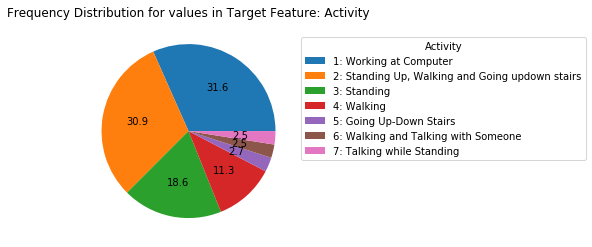

In [21]:
#import pyplot module from matplotlib package
import matplotlib.pyplot as plt

#plot frequency distribution for values in Target feature Activity
labels = ['1: Working at Computer', '2: Standing Up, Walking and Going updown stairs', '3: Standing',\
          '4: Walking', '5: Going Up-Down Stairs', '6: Walking and Talking with Someone', '7: Talking while Standing']
df_user_dat['Activity'].value_counts().plot(kind = 'pie', 
                                            autopct = '%.1f', 
                                            textprops={'fontsize': 10},
                                            labels = ['','','','','','',''])
plt.title("Frequency Distribution for values in Target Feature: Activity")
plt.legend(labels, loc="right",bbox_to_anchor=(2.35,0.65), title = 'Activity')
plt.ylabel(' ')
plt.show()

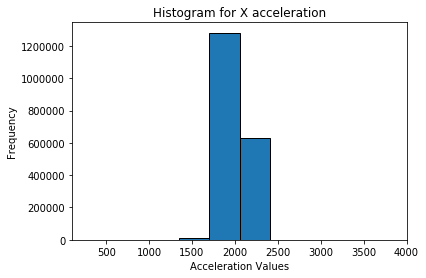

In [22]:
#plot histogram for X acceleration values
plt.hist(df_user_dat['X'], edgecolor = 'black')
plt.title('Histogram for X acceleration')
plt.xlabel('Acceleration Values')
plt.ylabel('Frequency')
plt.show()

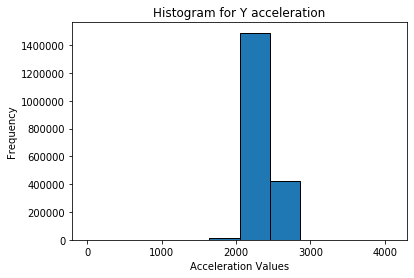

In [23]:
#plot histogram for Y acceleration values
plt.hist(df_user_dat['Y'], edgecolor = 'black')
plt.title('Histogram for Y acceleration')
plt.xlabel('Acceleration Values')
plt.ylabel('Frequency')
plt.show()

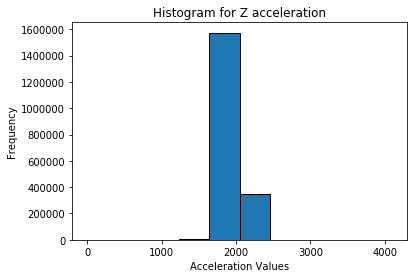

In [24]:
#plot histogram for z acceleration values
plt.hist(df_user_dat['Z'], edgecolor = 'black')
plt.title('Histogram for Z acceleration')
plt.xlabel('Acceleration Values')
plt.ylabel('Frequency')
plt.show()

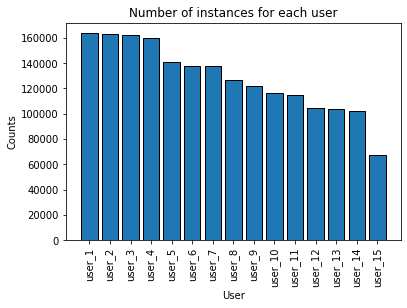

In [25]:
#plot bar chart displaying number of instances recorded for each user
plt.bar(df_user_dat['User'].unique(), df_user_dat['User'].value_counts(), edgecolor = 'black')
plt.title('Number of instances for each user')
plt.xlabel('User')
plt.xticks(rotation = 90)
plt.ylabel('Counts')
plt.show()

# Task 2.2: Explore the relationship between pairs of attributes

In [26]:
#compute correlation for X, Y and Z acceleration values
df_user_dat[['X','Y', 'Z']].corr().round(2)

,X,Y,Z
X,1.00,0.36,0.01
Y,0.36,1.00,0.35
Z,0.01,0.35,1.00


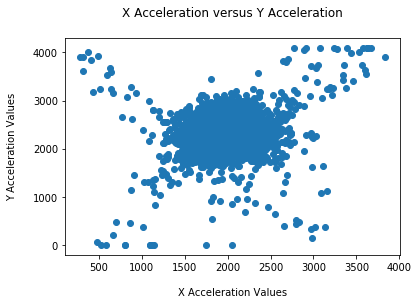

In [27]:
#scatter plot for X acceleration values v/s Y acceleration values
plt.scatter(df_user_dat['X'], df_user_dat['Y'])
plt.title('X Acceleration versus Y Acceleration\n')
plt.xlabel('\nX Acceleration Values')
plt.ylabel('Y Acceleration Values\n')
plt.show()

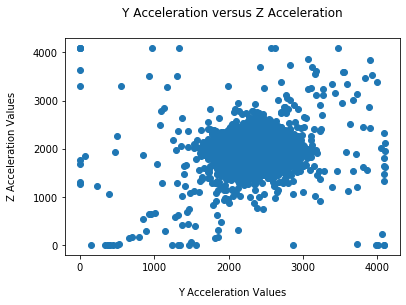

In [28]:
#scatter plot for Y acceleration values v/s Z acceleration values
plt.scatter(df_user_dat['Y'], df_user_dat['Z'])
plt.title('Y Acceleration versus Z Acceleration\n')
plt.xlabel('\nY Acceleration Values')
plt.ylabel('Z Acceleration Values\n')
plt.show()

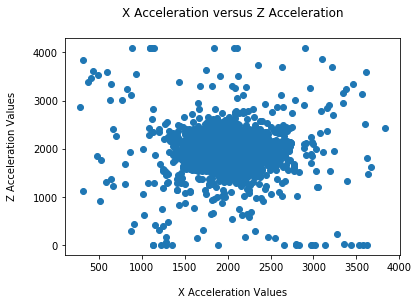

In [29]:
#scatter plot for X acceleration values v/s Z acceleration values
plt.scatter(df_user_dat['X'], df_user_dat['Z'])
plt.title('X Acceleration versus Z Acceleration\n')
plt.xlabel('\nX Acceleration Values')
plt.ylabel('Z Acceleration Values\n')
plt.show()

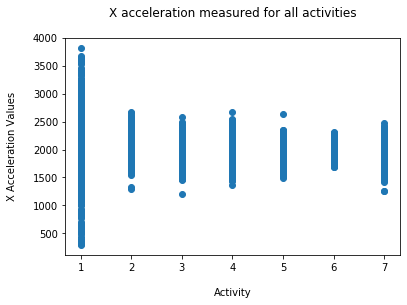

In [30]:
#scatter plot for activity-wise X acceleration
plt.scatter(df_user_dat['Activity'], df_user_dat['X'])
plt.title('X acceleration measured for all activities\n')
plt.xlabel('\nActivity')
plt.ylabel('X Acceleration Values\n')
plt.show()

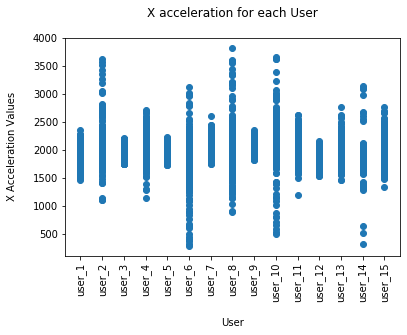

In [31]:
#scatter plot for user-wise X acceleration
plt.scatter(df_user_dat['User'], df_user_dat['X'])
plt.title('X acceleration for each User\n')
plt.xlabel('\nUser')
plt.xticks(rotation=90)
plt.ylabel('X Acceleration Values\n')
plt.show()

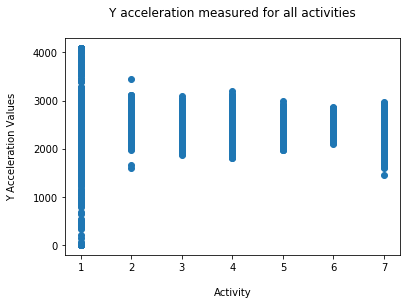

In [32]:
#scatter plot for activity-wise Y acceleration
plt.scatter(df_user_dat['Activity'], df_user_dat['Y'])
plt.title('Y acceleration measured for all activities\n')
plt.xlabel('\nActivity')
plt.ylabel('Y Acceleration Values\n')
plt.show()

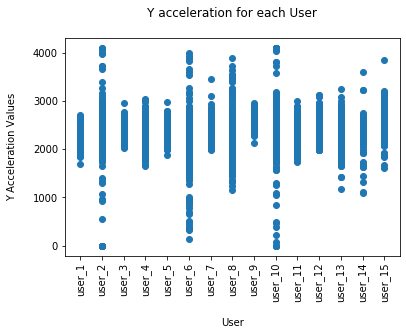

In [33]:
#scatter plot for user-wise Y acceleration
plt.scatter(df_user_dat['User'], df_user_dat['Y'])
plt.title('Y acceleration for each User\n')
plt.xlabel('\nUser')
plt.xticks(rotation=90)
plt.ylabel('Y Acceleration Values\n')
plt.show()

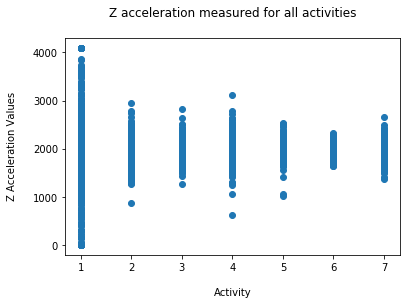

In [34]:
#scatter plot for activity-wise Z acceleration
plt.scatter(df_user_dat['Activity'], df_user_dat['Z'])
plt.title('Z acceleration measured for all activities\n')
plt.xlabel('\nActivity')
plt.ylabel('Z Acceleration Values\n')
plt.show()

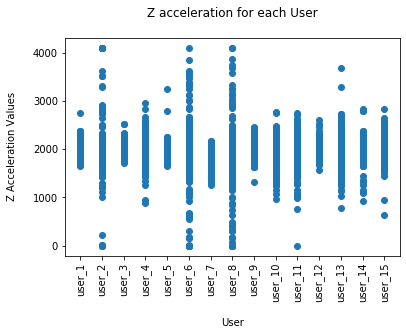

In [35]:
#scatter plot for user-wise Z acceleration
plt.scatter(df_user_dat['User'], df_user_dat['Z'])
plt.title('Z acceleration for each User\n')
plt.xlabel('\nUser')
plt.xticks(rotation=90)
plt.ylabel('Z Acceleration Values\n')
plt.show()

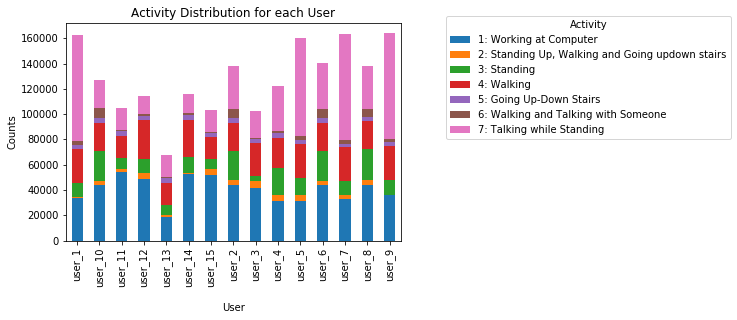

In [36]:
#plot stacked bar graph to display activity distribution for each user
labels = ['1: Working at Computer', '2: Standing Up, Walking and Going updown stairs', '3: Standing',\
          '4: Walking', '5: Going Up-Down Stairs', '6: Walking and Talking with Someone', '7: Talking while Standing']
df_user_dat.groupby(['User', 'Activity']).size().unstack().plot.bar(stacked = True)
plt.title('Activity Distribution for each User')
plt.xlabel('\nUser')
plt.ylabel('Counts')
plt.legend(labels, loc="right",bbox_to_anchor=(2,0.75), title = 'Activity')
plt.show()

# Task 3: Data Modelling

## Setting the stage

In [37]:
#import the required modules from scikit-learn package
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

from sklearn.pipeline import Pipeline

from sklearn import preprocessing, metrics
from scipy import stats

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [38]:
%%capture

#fix jupyter-altair compatibility issue
!pip install --upgrade altair
!pip install vega vega_datasets

#import altair package
import altair as alt
alt.renderers.enable('html')

In [39]:
#custom function to format the hyper-paramter tuning results as a Pandas data frame
def get_results(gs):

    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores)}
        return pd.Series({**params,**scores})

    models = []
    scores = []

    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))

    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))

    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)

    columns_first = ['mean_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]

    return pipe_results[columns]

## Split train and test data

In [40]:
#split descritpive and target feature data into train and test
train_data, test_data, train_target, test_target = train_test_split(Data, 
                                                                    Target, 
                                                                    test_size = 0.3, 
                                                                    stratify = Target, 
                                                                    random_state = 111)

In [41]:
#verify if the data has been correctly split
print('For Train Data:')
print('Rows:', train_data.shape[0], ', Columns:', train_data.shape[1])

print('\nFor Train Target:')
print('Rows:', train_target.shape[0])

print('\nFor Test Data:')
print('Rows:', test_data.shape[0], ', Columns:', test_data.shape[1])

print('\nFor Test Target:')
print('Rows:', test_target.shape[0])

For Train Data:
Rows: 70000 , Columns: 18

For Train Target:
Rows: 70000

For Test Data:
Rows: 30000 , Columns: 18

For Test Target:
Rows: 30000


## Feature Selection, Hyper-parameter Tuning and Training the Model

### For k-Nearest Neighbours

In [42]:
#define the k-NN model pipeline
pipe_kNN = Pipeline([('fselector', SelectKBest()), 
                     ('knn', KNeighborsClassifier())])

#define the parameters to be considered for tuning the k-NN model
params_pipe_kNN = {'fselector__score_func': [f_classif, mutual_info_classif],
                   'fselector__k': [3, 10, 18],
                   'knn__n_neighbors': [1, 5, 10, 50, 100],
                   'knn__p': [1, 2]}

#define the hyper-parameter tuning strategy for k-NN model
gs_kNN = GridSearchCV(estimator = pipe_kNN, 
                      param_grid = params_pipe_kNN, 
                      cv = 7,
                      verbose = 1,
                      scoring = 'accuracy', 
                      n_jobs = -2,
                      return_train_score = True)

#train the k-NN model and perform hyper-parameter tuning
gs_kNN.fit(train_data, train_target)

Fitting 7 folds for each of 60 candidates, totalling 420 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-2)]: Done 420 out of 420 | elapsed: 49.6min finished


GridSearchCV(cv=7, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('fselector',
                                        SelectKBest(k=10,
                                                    score_func=<function f_classif at 0x000001502DD42D38>)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
             iid='deprecated', n_jobs=-2,
        

In [43]:
#display the best parameters identified for k-NN model
gs_kNN.best_params_

{'fselector__k': 18,
 'fselector__score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>,
 'knn__n_neighbors': 10,
 'knn__p': 2}

In [44]:
#fetch performance scores for all combinations of hyper-parameters
result_kNN = get_results(gs_kNN)

#plot the performance scores for K-Nearest Neighbour model
alt.Chart(result_kNN.loc[result_kNN['fselector__k'] == 18, ['mean_score','knn__n_neighbors','knn__p']], 
          title = 'Hyper-parameter Tuning Results: K-Nearest Neighbours'
         ).mark_line(point=True).encode(alt.X('knn__n_neighbors', title = 'Number of Neighbors'),
                                        alt.Y('mean_score', title = 'Accuracy', scale = alt.Scale(zero = False)),
                                        alt.Color('knn__p:N', title = 'p')
)

alt.Chart(...)

### For Decision Tree

In [45]:
#define the DT model pipeline
pipe_DT = Pipeline([('fselector', SelectKBest()), 
                    ('dt', DecisionTreeClassifier())])

#define the parameters to be considered for tuning the DT model
params_pipe_DT = {'fselector__score_func': [f_classif, mutual_info_classif],
                  'fselector__k': [3, 10, 18],
                  'dt__criterion': ['gini', 'entropy'],
                  'dt__max_depth': [3, 5, 10],
                  'dt__min_samples_split': [50, 100, 500]}

#define the hyper-parameter tuning strategy for DT model
gs_DT = GridSearchCV(estimator = pipe_DT, 
                      param_grid = params_pipe_DT, 
                      cv = 7,
                      verbose = 1,
                      scoring = 'accuracy', 
                      n_jobs = -2,
                      return_train_score = True)

#train the DT model and perform hyper-parameter tuning
gs_DT.fit(train_data, train_target)

Fitting 7 folds for each of 108 candidates, totalling 756 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  49 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-2)]: Done 200 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-2)]: Done 450 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-2)]: Done 756 out of 756 | elapsed: 30.1min finished


GridSearchCV(cv=7, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('fselector',
                                        SelectKBest(k=10,
                                                    score_func=<function f_classif at 0x000001502DD42D38>)),
                                       ('dt',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_s

In [46]:
#display the best parameters identified for DT model
gs_DT.best_params_

{'dt__criterion': 'gini',
 'dt__max_depth': 10,
 'dt__min_samples_split': 50,
 'fselector__k': 10,
 'fselector__score_func': <function sklearn.feature_selection._mutual_info.mutual_info_classif(X, y, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)>}

In [47]:
#fetch performance scores for all combinations of hyper-parameters
result_DT = get_results(gs_DT)

#plot the performance scores for Decision Tree model
alt.Chart(result_DT.loc[result_DT['fselector__k'] == 10, ['mean_score','dt__min_samples_split','dt__max_depth']], 
          title = 'Hyper-parameter Tuning Results: Decision Tree'
         ).mark_line(point = True).encode(
    alt.X('dt__min_samples_split', title = 'Minimum Samples for Split'),
    alt.Y('mean_score', title = 'Accuracy', scale = alt.Scale(zero = False)),
    alt.Color('dt__max_depth:N', title = 'Maximum Depth')
)

alt.Chart(...)

## Model Evaluation

### For k-Nearest Neighbours

In [48]:
#display the best score obtained by k-NN model based on training data
gs_kNN.best_score_

0.7902571428571428

In [49]:
#predict the values using test data and above defined k-NN model
test_target_pred_kNN = gs_kNN.predict(test_data)

In [50]:
#compute the confusion matrix for predicted target
metrics.confusion_matrix(test_target, test_target_pred_kNN)

array([[9234,   45,   38,  122,    8,    1,   86],
       [ 323,  172,   39,  133,    4,    3,   73],
       [ 145,   22, 1761,  664,   60,   34,  698],
       [ 272,   27,  418, 4309,   32,   19,  515],
       [  37,    4,  191,  328,   99,    9,  135],
       [   8,    1,   91,  143,   32,  164,  312],
       [ 189,   22,  482,  416,   30,  101, 7949]], dtype=int64)

In [51]:
#display the classification report
print(metrics.classification_report(test_target, test_target_pred_kNN))

              precision    recall  f1-score   support

           1       0.90      0.97      0.94      9534
           2       0.59      0.23      0.33       747
           3       0.58      0.52      0.55      3384
           4       0.70      0.77      0.74      5592
           5       0.37      0.12      0.19       803
           6       0.50      0.22      0.30       751
           7       0.81      0.87      0.84      9189

    accuracy                           0.79     30000
   macro avg       0.64      0.53      0.55     30000
weighted avg       0.77      0.79      0.77     30000



In [52]:
#display the accuracy score for predicted target
acc_score_kNN = metrics.accuracy_score(test_target, test_target_pred_kNN)
print('Accuracy for K-Nearest Neighbours model:', acc_score_kNN)

Accuracy for K-Nearest Neighbours model: 0.7896


### Desision Tree

In [53]:
#display the best score obtained by DT model based on training data
gs_DT.best_score_

0.7157857142857142

In [54]:
#predict the values using test data and above defined DT model
test_target_pred_DT = gs_DT.predict(test_data)

In [55]:
#compute the confusion matrix for predicted target
metrics.confusion_matrix(test_target, test_target_pred_DT)

array([[8858,   35,   93,  317,    3,    0,  228],
       [ 355,   66,   28,  197,    2,    1,   98],
       [ 250,    5, 1382,  835,   20,   13,  879],
       [ 514,    7,  428, 3767,   29,   14,  833],
       [  85,    0,  198,  336,   34,    2,  148],
       [  25,    0,  191,  153,    1,   41,  340],
       [ 316,    1,  810,  679,    5,   41, 7337]], dtype=int64)

In [56]:
#display the classification report
print(metrics.classification_report(test_target, test_target_pred_DT))

              precision    recall  f1-score   support

           1       0.85      0.93      0.89      9534
           2       0.58      0.09      0.15       747
           3       0.44      0.41      0.42      3384
           4       0.60      0.67      0.63      5592
           5       0.36      0.04      0.08       803
           6       0.37      0.05      0.10       751
           7       0.74      0.80      0.77      9189

    accuracy                           0.72     30000
   macro avg       0.56      0.43      0.43     30000
weighted avg       0.69      0.72      0.69     30000



In [57]:
#display the accuracy score for predicted target
acc_score_DT = metrics.accuracy_score(test_target, test_target_pred_DT)
print('Accuracy for Decision Tree model:', acc_score_DT.round(4))

Accuracy for Decision Tree model: 0.7162
